Importing the Dependancies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
# loading the mnist data from keras.datasets
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
# shape of the numpy array
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 images

Testing data = 10,000 images

Image dimension = 28 x 28

Grayscale image = 1 channel

In [ ]:
# printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


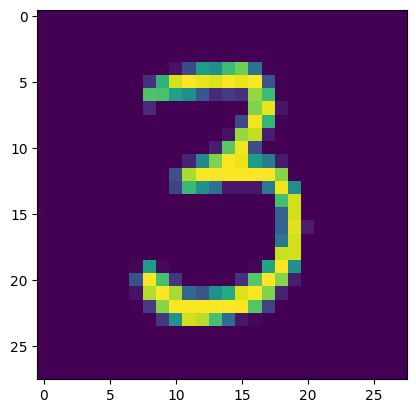

3


In [ ]:
# displaying the image
plt.imshow(X_train[50])
plt.show()

# print the corresponding label Y_train[50]
print(Y_train[50])

Image Labels

In [ ]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Scaling the value
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
# printing the 10th image
print(X_test[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [ ]:
# setting up the layers of the neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
# compiling the neural network
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# training the neural network
model.fit(X_train, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3113 - accuracy: 0.9096 - val_loss: 0.1343 - val_accuracy: 0.9600
Epoch 2/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1387 - accuracy: 0.9584 - val_loss: 0.1143 - val_accuracy: 0.9663
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1022 - accuracy: 0.9681 - val_loss: 0.1127 - val_accuracy: 0.9658
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0808 - accuracy: 0.9749 - val_loss: 0.0895 - val_accuracy: 0.9732
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0676 - accuracy: 0.9787 - val_loss: 0.0893 - val_accuracy: 0.9757
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0557 - accuracy: 0.9827 - val_loss: 0.1001 - val_accuracy: 0.9708
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0488 - accuracy: 0.9843 - val_loss: 0.0911 - val_accuracy:

Training data accuracy = 99.61 %

**Accuracy on Test Data**

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1157 - accuracy: 0.9707
0.9707000255584717


Testing data accuracy = 97.47%

In [ ]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
# converting the prediction probabilities to class label
print(np.argmax(Y_pred[0]))

7


In [ ]:
print(Y_test[0])

7


In [ ]:
# converting the prediction probabilities to class label
Y_pred_label = [np.argmax(i) for i in Y_pred]

Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred_label)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 967    1    3    1    0    1    2    1    4    0]
 [   0 1116    2    0    0    1    2    1   13    0]
 [   1    1 1008    9    1    0    2    3    6    1]
 [   0    0    3  994    0    3    0    5    5    0]
 [   2    0    7    0  932    3    5    3    1   29]
 [   2    0    0   23    0  835    9    1   21    1]
 [   5    1    0    0    0    6  939    0    6    1]
 [   1    4   11    7    2    0    0  997    0    6]
 [   3    0    2   11    1    2    0    3  951    1]
 [   3    4    1   13    3    5    0    7   10  963]], shape=(10, 10), dtype=int32)


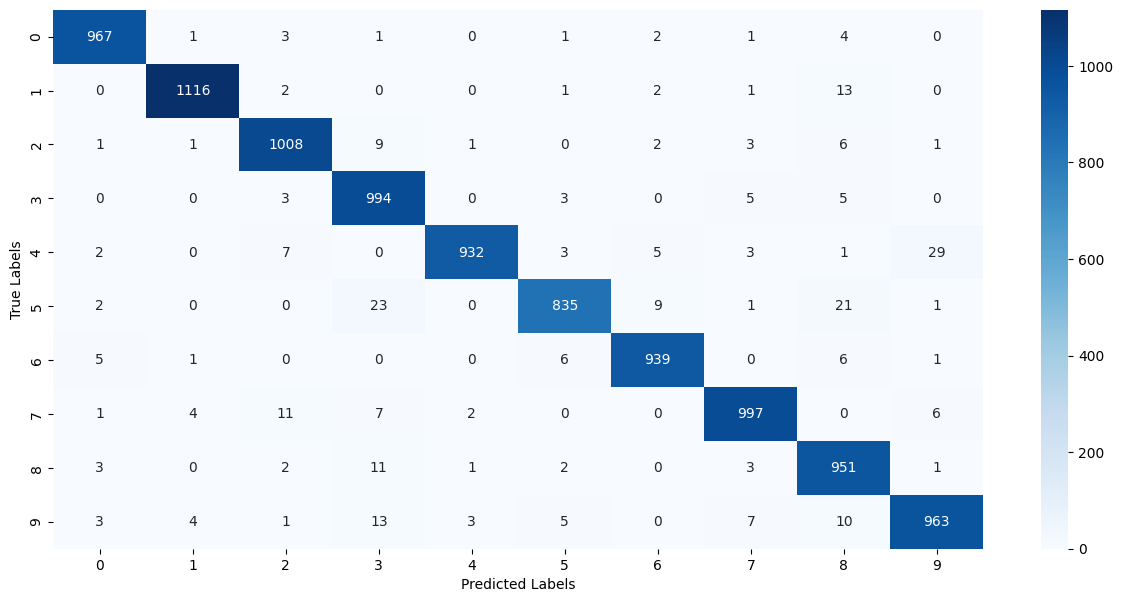

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel("Predicted Labels")
plt.show()

Building a predictive system

In [ ]:
input_image_path = '/content/drive/MyDrive/Colab Notebooks/three2.png'

input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image.shape)

(452, 451, 3)


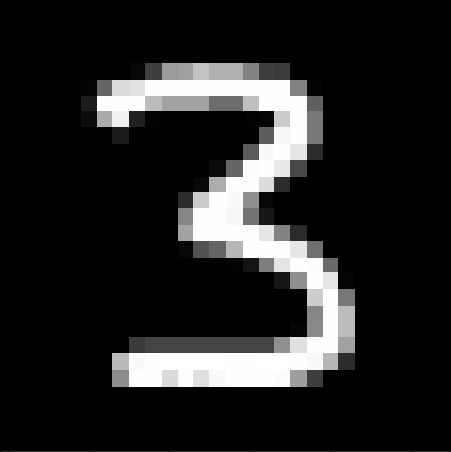

In [ ]:
cv2_imshow(input_image)

In [ ]:
gray_scale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
gray_scale.shape

(452, 451)

In [ ]:
# input image resize
input_image_resize = cv2.resize(gray_scale, (28,28))

In [ ]:
print(input_image_resize.shape)

(28, 28)


In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
# scale the image
input_image_scale = input_image_resize/255.0

In [ ]:
image_reshaped = np.reshape(input_image_scale, [1,28,28])

In [ ]:
input_pred = model.predict(image_reshaped)
print(input_pred)

1/1 [==============================] - 0s 24ms/step
[[8.87097394e-06 9.47821915e-01 9.98785377e-01 1.00000000e+00
  1.31675890e-07 4.44865152e-02 1.13163885e-07 5.46225294e-07
  9.87809658e-01 1.22639607e-03]]


In [ ]:
np.argmax(input_pred)

3